<b><font size="7">Task 2</font></b>

<b>Using GPU for deep learning task

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 17 08:49:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

<b>View our image dataset

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.


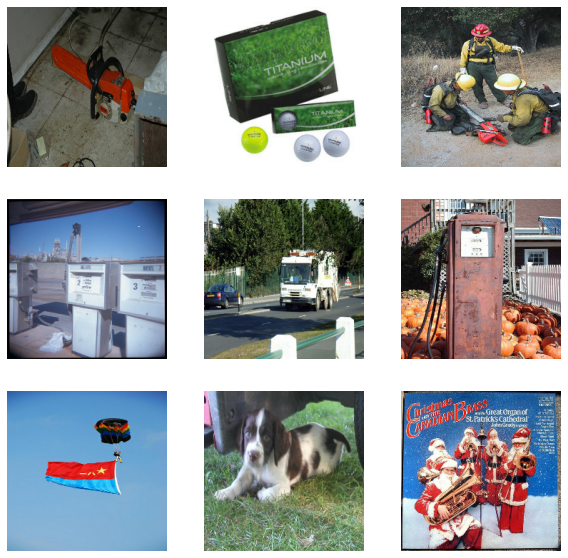

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#load train and validation image data into ipynb
train_set = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=64)

val_set = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=32)


plt.figure(figsize=(10, 10))

for images, labels in val_set.take(1):

  for i in range(9):

    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(images[i].numpy().astype("uint8"))

    plt.axis("off")




<b>Displaying effect of resize_and_rescale

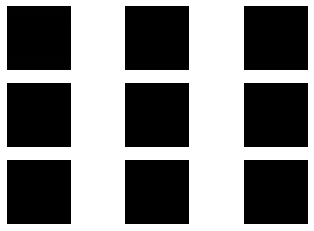

In [ ]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])


train_set = train_set.map(lambda image,label:(resize_and_rescale(image),label))

val_set = val_set.map(lambda image,label:(resize_and_rescale(image),label))

for images, labels in val_set.take(1):

  for i in range(9):

    ax = plt.subplot(3, 3, i + 1)

    plt.imshow(images[i].numpy().astype("uint8"))

    plt.axis("off")

<b>Building my CNN: VNET88

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=64)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=64)

#Define your own deep learning convolutional model
from tensorflow.keras import Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                    

Found 9469 files belonging to 10 classes.
Found 3925 files belonging to 10 classes.
SparseCategoricalAccuracy(name=train_accuracy,dtype=float32)


100%|██████████| 123/123 [01:52<00:00,  1.10it/s]


Epoch 1, Loss: 1.8568521738052368, Accuracy: 34.69215393066406, Test Loss: 1.6340606212615967, Test Accuracy: 44.91719436645508


100%|██████████| 123/123 [00:07<00:00, 16.26it/s]


Epoch 2, Loss: 1.3248558044433594, Accuracy: 55.686981201171875, Test Loss: 1.2522311210632324, Test Accuracy: 59.337581634521484


100%|██████████| 123/123 [00:07<00:00, 16.20it/s]


Epoch 3, Loss: 1.0261896848678589, Accuracy: 66.74411010742188, Test Loss: 1.140499472618103, Test Accuracy: 64.30573272705078


100%|██████████| 123/123 [00:07<00:00, 16.23it/s]


Epoch 4, Loss: 0.8279021382331848, Accuracy: 73.13338470458984, Test Loss: 1.0564357042312622, Test Accuracy: 66.90446472167969


100%|██████████| 123/123 [00:07<00:00, 16.26it/s]


Epoch 5, Loss: 0.6241022348403931, Accuracy: 80.06124877929688, Test Loss: 1.246193528175354, Test Accuracy: 66.2929916381836


100%|██████████| 123/123 [00:07<00:00, 16.35it/s]


Epoch 6, Loss: 0.4453294575214386, Accuracy: 85.63734436035156, Test Loss: 1.3281939029693604, Test Accuracy: 63.974525451660156


100%|██████████| 123/123 [00:07<00:00, 16.25it/s]


Epoch 7, Loss: 0.284862756729126, Accuracy: 90.89661407470703, Test Loss: 1.6936923265457153, Test Accuracy: 63.36305618286133


100%|██████████| 123/123 [00:07<00:00, 16.28it/s]


Epoch 8, Loss: 0.17993837594985962, Accuracy: 94.05428314208984, Test Loss: 2.0357820987701416, Test Accuracy: 61.88534927368164


100%|██████████| 123/123 [00:07<00:00, 16.35it/s]


Epoch 9, Loss: 0.11884263902902603, Accuracy: 96.29316711425781, Test Loss: 2.08182430267334, Test Accuracy: 64.2802505493164


100%|██████████| 123/123 [00:07<00:00, 16.27it/s]


Epoch 10, Loss: 0.09831440448760986, Accuracy: 96.87400817871094, Test Loss: 2.261425018310547, Test Accuracy: 61.78343963623047


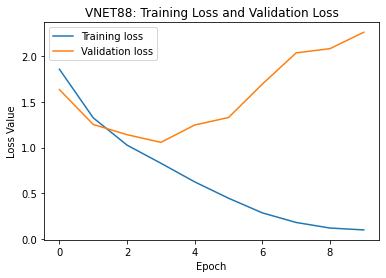

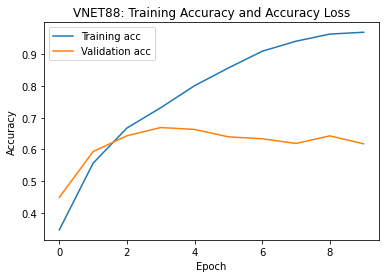

Saved epoch = 10 model weights to disk


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#load train and validation image data into ipynb
train_set = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=32)


val_set = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  seed=123,
  image_size=(224, 224),
  batch_size=32)

#Resizing image's size to make sure its 224x224 and rescaling the image's intensity to be in range [0,1]
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(224, 224),
  tf.keras.layers.Rescaling(1./255)
])

train_set = train_set.map(lambda image,label:(resize_and_rescale(image),label))
val_set = val_set.map(lambda image,label:(resize_and_rescale(image),label))

#Define your own deep learning convolutional model
from tensorflow.keras import Model

class VNET88(Model):
  def __init__(self):
    super(VNET88, self).__init__()
    #define a convolutional layer, 32 - kernel numbers 3 - kernel size
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.conv2 = Conv2D(64, 3, activation='relu')
    self.conv3 = Conv2D(128, 3, activation='relu')
    self.conv4 = Conv2D(128, 3, activation='relu')
    #define max pooling layer
    self.pool1 = MaxPool2D()
    self.pool2=MaxPool2D()
    self.pool3=MaxPool2D()
    #define function to convert from 2D image (response maps) to 1D vector
    self.flatten = Flatten()
    #define fully connected layer, output size 128
    self.d1 = Dense(128, activation='relu')  
    #define fully connected layer, output size 64
    self.d2 = Dense(64, activation='relu')
    #define fully connected layer, output size 10
    self.d3 = Dense(10)

  def call(self, x):
    #use of the defined covolutional layer 1
    x = self.conv1(x)
    #use of the defined pooling layer 1
    x = self.pool1(x)
    #use of the defined covolutional layer 2
    x = self.conv2(x)
    #use of the defined pooling layer 2
    x = self.pool2(x)
    #use of the defined covolutional layer 3
    x = self.conv3(x)
    #use of the defined pooling layer 3
    x = self.pool3(x)
    #use of the defined covolutional layer 4
    x = self.conv4(x)
    #use of the flatten function
    x = self.flatten(x)
    #use of the fully connected layer 1
    x = self.d1(x)
    #use of the fully connected layer 2
    x = self.d2(x)
    #use of the fully connected layer 3
    return self.d3(x)

# Create an instance of the model
model = VNET88()

#define loss function
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

#define optimizer
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
print(train_accuracy)


@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

#Here is the function to evaluate the accuracy of the testing images
@tf.function
def test_step(images, labels):
# training=False is only needed if there are layers with different
# behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)
  test_accuracy(labels, predictions)

#Here is the main part of the training of CNN model, assume we will go 5 epochs and each epoch will use all the training data for reducing the losses
EPOCHS = 10

train_acc_details = []
train_loss_details = []
val_acc_details = []
val_loss_details = []

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()
  for images, labels in tqdm(train_set):
    train_step(images, labels)

  for test_images, test_labels in tqdm(val_set):
    test_step(test_images, test_labels)
  
  train_acc_details.append(train_accuracy.result())
  train_loss_details.append(train_loss.result())
  val_acc_details.append(test_accuracy.result())
  val_loss_details.append(test_loss.result())

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

    # Plotting loss function
plt.plot(train_loss_details, label='Training loss')
plt.plot(val_loss_details, label='Validation loss')
plt.title("VNET88: Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.legend()
plt.show()

# Plotting accuracy
train_acc = np.array(train_acc_details)
val_acc = np.array(val_acc_details)

plt.plot(train_acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.title("VNET88: Training Accuracy and Accuracy Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#Save model weights
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/e10_VENET88.h5")
print("Saved epoch = 10 model weights to disk")

<b>Attempt = 2, Fine Tunning VENET88, Try and add image augmentation layer using ImageDataGenerator and flow_from_directory function

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/10
148/148 [==============================] - 7412s 50s/step - loss: 1.8424 - accuracy: 0.3546 - val_loss: 1.5673 - val_accuracy: 0.4813
Epoch 2/10
148/148 [==============================] - 156s 1s/step - loss: 1.3347 - accuracy: 0.5564 - val_loss: 1.4735 - val_accuracy: 0.5218
Epoch 3/10
148/148 [==============================] - 156s 1s/step - loss: 1.1278 - accuracy: 0.6298 - val_loss: 1.0842 - val_accuracy: 0.6428
Epoch 4/10
148/148 [==============================] - 156s 1s/step - loss: 1.0121 - accuracy: 0.6739 - val_loss: 1.2708 - val_accuracy: 0.5964
Epoch 5/10
148/148 [==============================] - 156s 1s/step - loss: 0.9171 - accuracy: 0.7022 - val_loss: 0.9586 - val_accuracy: 0.6935
Epoch 6/10
148/148 [==============================] - 156s 1s/step - loss: 0.8256 - accuracy: 0.7331 - val_loss: 1.0495 - val_accuracy: 0.6749
Epoch 7/10
148/148 [==============================] - 

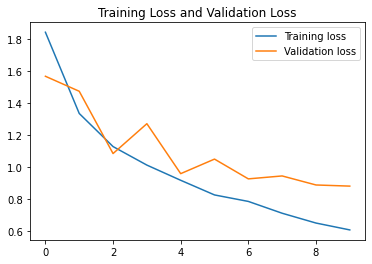

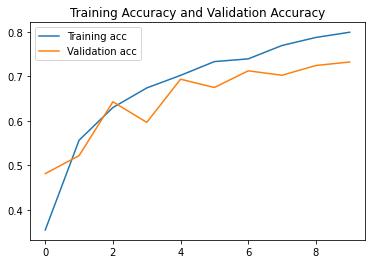

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=64)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=64)

#Define your own deep learning convolutional model
from tensorflow.keras import Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      batch_size=64,
      epochs=10,
      validation_data=validation_generator)


model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified2_e10_vnet88.h5")
print("Saved epoch = 10, fine tunned VNET88 model weights to disk")

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()

<b>Attempt = 3, For fine tunning VETNET,  add 2 dropout layer

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Epoch 1/10
148/148 [==============================] - 186s 1s/step - loss: 2.2256 - accuracy: 0.1786 - val_loss: 2.0242 - val_accuracy: 0.2930
Epoch 2/10
148/148 [==============================] - 190s 1s/step - loss: 2.0021 - accuracy: 0.2800 - val_loss: 1.8207 - val_accuracy: 0.3546
Epoch 3/10
148/148 [==============================] - 189s 1s/step - loss: 1.8143 - accuracy: 0.3691 - val_loss: 1.5760 - val_accuracy: 0.4668
Epoch 4/10
148/148 [==============================] - 188s 1s/step - loss: 1.6836 - accuracy: 0.4226 - val_loss: 1.5155 - val_accuracy: 0.4991
Epoch 5/10
148/148 [==============================] - 188s 1s/step - loss: 1.5779 - accuracy: 0.4637 - val_loss: 1.4118 - val_accuracy: 0.5287
Epoch 6/10
148/148 [==============================] - 188s 1s/step - loss: 1.4839 - accuracy: 0.5101 - val_loss: 1.2893 - val_accuracy: 0.5898
Epoch 7/10
148/148 [==============================] - 18

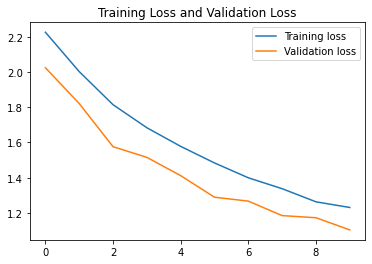

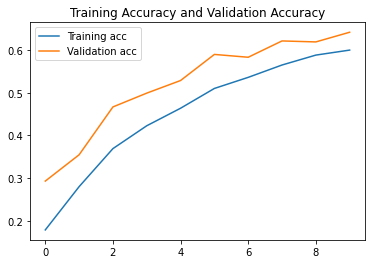

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=64)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=64)

#Define your own deep learning convolutional model
from tensorflow.keras import Model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

history = model.fit(
      train_generator,
      batch_size=64,
      epochs=10,
      validation_data=validation_generator,
      callbacks = callbacks)


model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified3_e10_vnet88.h5")
print("Saved epoch = 10, fine tunned VNET88 model weights to disk")

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()

<b>Attempt = 4, VNET88, Adding batch normalization layer, adjust dropout layer and dense nodes

Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                    

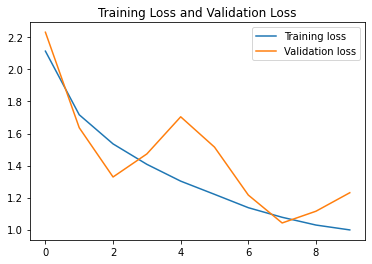

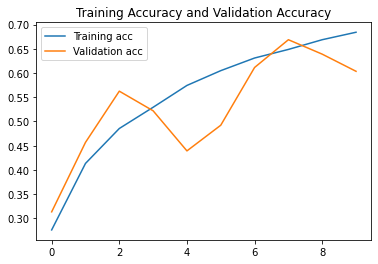

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#Set image data directory
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

train_datagen = ImageDataGenerator(shear_range = 0.2,
                                   rescale=1./255,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32)

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32)

#Define your own deep learning convolutional model
from tensorflow.keras import Model
from keras.callbacks import EarlyStopping

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

history = model.fit(
      train_generator,
      batch_size=64,
      epochs=10,
      validation_data=validation_generator,
      callbacks = callbacks)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training acc')
plt.plot(history.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()


<b>Trasnfer Learning: Using VGG16 model on our dataset

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

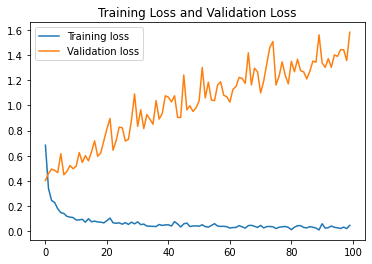

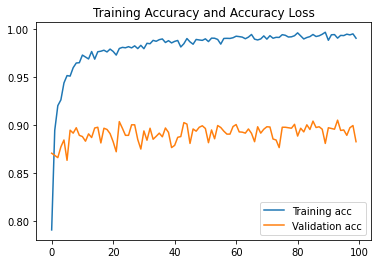

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
for layer in vgg.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_vgg.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=100,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/e100_vgg.h5")
print("Saved epoch = 100, VGG16 model weights to disk")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')



Visualising VGG16 Loss and Accuracy graphs

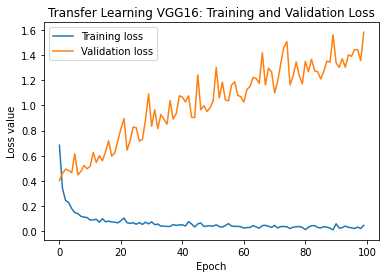

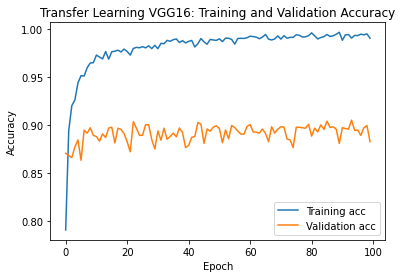

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning VGG16: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning VGG16: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

<b>Transfer Learning: ResNet50

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

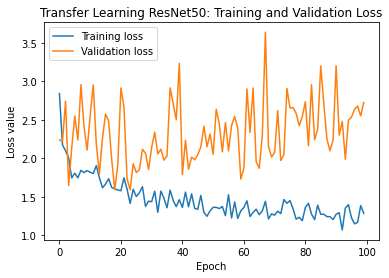

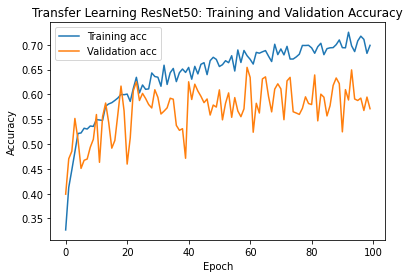

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of transfer model
#transfer_m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


transfer_m = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=1000)


# Freeze transfer model layers
for layer in transfer_m.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(transfer_m.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=transfer_m.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Only rescaling testing set
test_datagen = ImageDataGenerator(rescale = 1./255)


#Import training data
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

#Import validation data
val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_resnet.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


model_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=100,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save  model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/e100_resnet.h5")
print("Saved epoch = 100, VGG16 model weights to disk")

#loaded_resnet = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(model_details.history['loss'], label='Training loss')
plt.plot(model_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning ResNet50: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(model_details.history['accuracy'], label='Training acc')
plt.plot(model_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning ResNet50: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')



Visualising ResNet Loss and Accuracy graphs

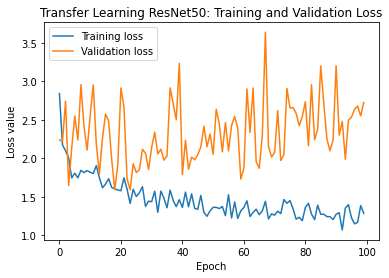

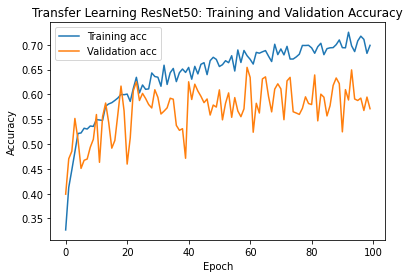

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting loss function
plt.plot(model_details.history['loss'], label='Training loss')
plt.plot(model_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning ResNet50: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(model_details.history['accuracy'], label='Training acc')
plt.plot(model_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning ResNet50: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

<b>Attemp = 1, Fine Tunning the Resnet50

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

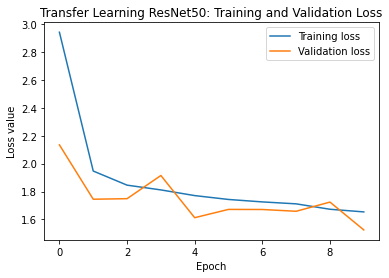

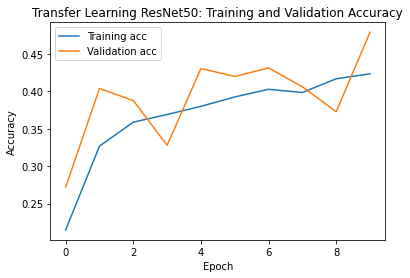

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of transfer model
#transfer_m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Changing the class  = 10
transfer_m = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=10)


# Freeze transfer model layers
for layer in transfer_m.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(transfer_m.output)
x = Dense(1000, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=transfer_m.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
#Add even more image augmentation!
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

#Only rescaling testing set
test_datagen = ImageDataGenerator(rescale = 1./255)


#Import training data
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

#Import validation data
val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_resnet.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


model_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=10,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save  model for epoch = 10
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/tuned e10_resnet.h5")
print("Saved epoch = 10, Fine tuned resNet50 model weights to disk")

#loaded_resnet = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(model_details.history['loss'], label='Training loss')
plt.plot(model_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning ResNet50: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(model_details.history['accuracy'], label='Training acc')
plt.plot(model_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning ResNet50: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

<b>Attempt = 2, for ResNet50, Try running Epoch = 30 instead as the values are not converaged yet

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

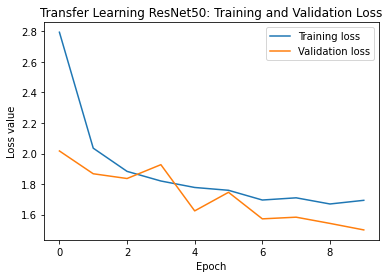

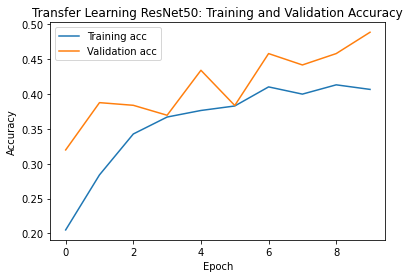

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of transfer model
#transfer_m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Changing the class  = 10
transfer_m = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=10)


# Freeze transfer model layers
for layer in transfer_m.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(transfer_m.output)
x = Dense(1000, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=transfer_m.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
#Add even more image augmentation!
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

#Only rescaling testing set
test_datagen = ImageDataGenerator(rescale = 1./255)


#Import training data
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

#Import validation data
val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_resnet.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


model_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=30,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save  model for epoch = 30
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/finetuned e30_resnet.h5")
print("Saved epoch = 30, Fine tuned resNet50 model weights to disk")

#loaded_resnet = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(model_details.history['loss'], label='Training loss')
plt.plot(model_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning ResNet50: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(model_details.history['accuracy'], label='Training acc')
plt.plot(model_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning ResNet50: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

<b> Attempt = 3, fine tuning ResNet50

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

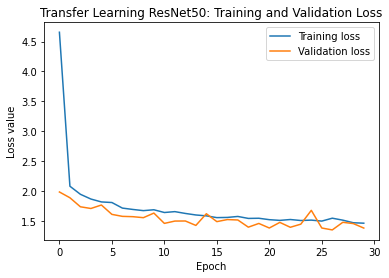

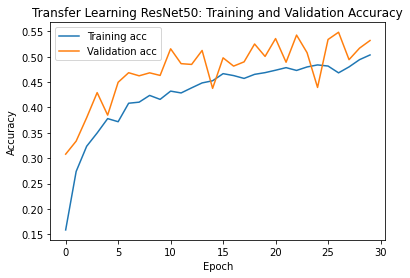

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of transfer model
#transfer_m = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Changing the class  = 10
transfer_m = tf.keras.applications.resnet50.ResNet50(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(224, 224, 3), pooling=None, classes=10)


# Freeze transfer model layers
for layer in transfer_m.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(transfer_m.output)
x = Dense(1000, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=transfer_m.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
#Add even more image augmentation!
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

#Only rescaling testing set
test_datagen = ImageDataGenerator(rescale = 1./255)


#Import training data
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

#Import validation data
val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_resnet.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


model_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=30,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save  model for epoch = 30
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/finetuned e30_resnet.h5")
print("Saved epoch = 30, Fine tuned resNet50 model weights to disk")

#loaded_resnet = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(model_details.history['loss'], label='Training loss')
plt.plot(model_details.history['val_loss'], label='Validation loss')
plt.title("Transfer Learning ResNet50: Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# Plotting accuracy
plt.plot(model_details.history['accuracy'], label='Training acc')
plt.plot(model_details.history['val_accuracy'], label='Validation acc')
plt.title("Transfer Learning ResNet50: Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')


#x = Dropout(0.3)(x)
#callbacks = [EarlyStopping(monitor='val_accuracy', patience = 3)]
#(inside .fit), callbacks = callbacks

Unsucessful fine tunning and validation accuracy is worse than before. Perhaps the model is too deep for prediction only 10 class, more attempts will be fine tunning VGG16

<b>Attempt = 1 ,Fine Tunning the VGG16, adding dense layers and changing node size to decending

58900480/58889256 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

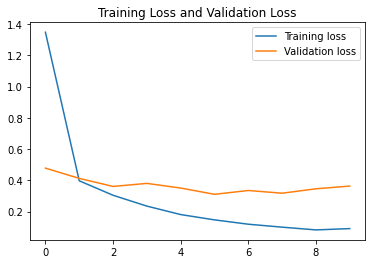

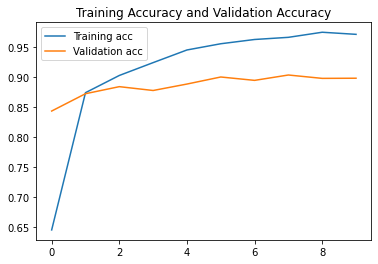

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
for layer in vgg.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 128,
                                            class_mode = 'categorical')

#Checkpoint for model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("checkpoint_vgg.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)


VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=10,
  callbacks=[checkpoint],
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set)
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified_e10_vgg.h5")
print("Saved epoch = 10, fine tunned VGG16 model weights to disk")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()


#x = Dropout(0.3)(x)
#callbacks = [EarlyStopping(monitor='val_accuracy', patience = 3)]
#(inside .fit), callbacks = callbacks

<b>Attempt = 2, Fine tunning VGG16, Attempt = 2, adding more image augmentation, drop-out layer and also implementing Early Stopping for automated detecting for overfitting

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

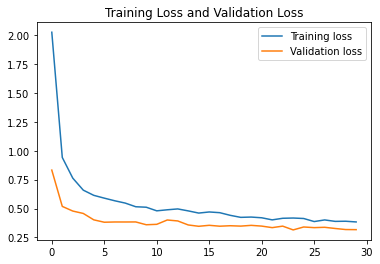

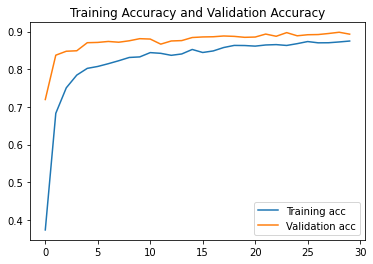

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
for layer in vgg.layers:
  layer.trainable = False
   
#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

#Use Early stopping for model to get out of epoch when overfitting appears
from keras.callbacks import EarlyStopping


callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks = callbacks
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified2_e10_vgg.h5")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()


#x = Dropout(0.3)(x)
#callbacks = [EarlyStopping(monitor='val_accuracy', patience = 3)]
#(inside .fit), callbacks = callbacks

The accuracy is still not imporving much from previous fine tunning action, the training in above is emphasis on the Dense layers at the end and the VGG16 was set to be untrainable, now lets try and unfreeze part of VGG16 in the layers extracting high level features as another fine tunning method. What has really improved is there is no overfitting problem present

<b>Attemp = 3, Fine tunning VGG16 by unfreezing part of the high level features

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#Original model
# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(1000, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

#Load fine tunned VGG16 model from above block
model.load_weights('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified2_e10_vgg.h5')

print("Number of layers in the VGG16 model: ", len(model.layers))

model.summary()

#Set model tranable = True
model.trainable = True

# # Fine-tune from this layer onwards
fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

#Use Early stopping for model to get out of epoch when overfitting appears
from keras.callbacks import EarlyStopping


callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks = callbacks
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified3_e30_vgg.h5")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()

Number of layers in the VGG16 model:  26
Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (Max

KeyboardInterrupt: ignored

I have forced stop the epoch above because accuracy is not really improving much

<b> Attemp = 4, Fine Tuning VGG16. Try and reduce the dense node and unfreeze more layers, not using pre-loaded layer

Number of layers in the VGG16 model:  25
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPoo

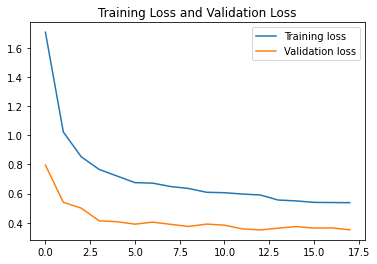

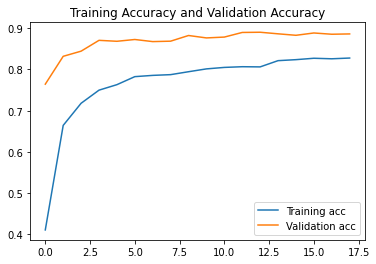

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#Original model
# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
for layer in vgg.layers:
  layer.trainable = False
   


#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

##Load fine tunned VGG16 model from above block
#model.load_weights('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified2_e10_vgg.h5')

print("Number of layers in the VGG16 model: ", len(model.layers))

model.summary()

#Set model tranable = True
#model.trainable = True

# # Fine-tune from this layer onwards
#fine_tune_at = 16

# Freeze all the layers before the `fine_tune_at` layer
#for layer in model.layers[:fine_tune_at]:
#  layer.trainable = False

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

#Use Early stopping for model to get out of epoch when overfitting appears
from keras.callbacks import EarlyStopping


callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks = callbacks
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified4_e30_vgg.h5")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()

<b>Attemp = 5, Fine Tuning VGG16. Try reduce dense layers again, not using loaded weight, next attempt will load this weight and unfreeze part of vgg16

Number of layers in the VGG16 model:  23
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxP

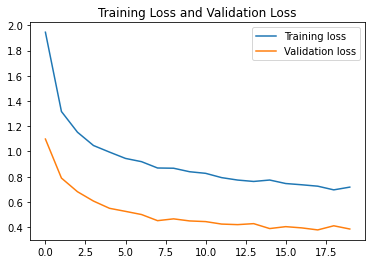

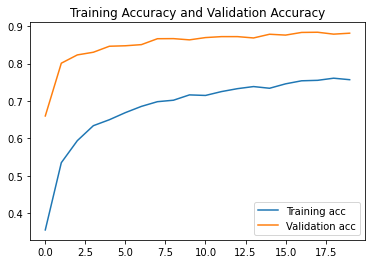

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#Original model
# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
for layer in vgg.layers:
  layer.trainable = False
   


#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

print("Number of layers in the VGG16 model: ", len(model.layers))

model.summary()

#Set model tranable = True
#model.trainable = True

# Fine-tune from this layer onwards
#fine_tune_at = 20

# Freeze all the layers before the `fine_tune_at` layer
#for layer in model.layers[:fine_tune_at]:
  #layer.trainable = False

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

#Use Early stopping for model to get out of epoch when overfitting appears
from keras.callbacks import EarlyStopping


callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks = callbacks
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified5_e20_vgg.h5")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()

<b>Attempt = 6, Fine Tuning VGG16. Load weight from above and unfreeze some layers in vgg16

Number of layers in the VGG16 model:  23
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxP

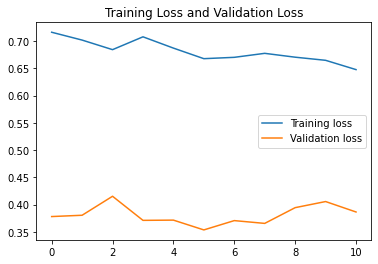

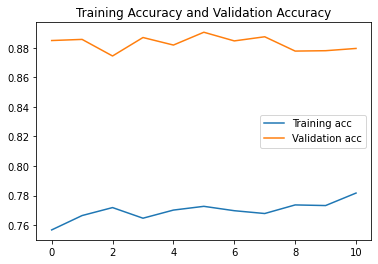

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf


#Image size required for VGG16 model
IMAGE_SIZE = [224, 224]

#Directory for our dataset
train_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/val"

#Original model
# Remove output layer of VGG16
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze VGG16 layers
#for layer in vgg.layers:
#  layer.trainable = False
   


#Useful for getting number of classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/imageset/train/*')
x = Flatten()(vgg.output)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# Create the model
model = Model(inputs=vgg.input, outputs=prediction)

#Load fine tunned VGG16 model from above block
model.load_weights('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified5_e20_vgg.h5')

print("Number of layers in the VGG16 model: ", len(model.layers))

model.summary()

#Set model tranable = True
#model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 18

# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

# Setting up cost function, optimiser and metrics for our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


#Image data augmentation: Rescaling intensity, adding shear_range, zoom_range and horizontal_flip to reduce overfitting on training data
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=10)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 256,
                                                 class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(val_dir,
                                            target_size = (224, 224),
                                            batch_size = 256,
                                            class_mode = 'categorical')

#Use Early stopping for model to get out of epoch when overfitting appears
from keras.callbacks import EarlyStopping


callbacks = [EarlyStopping(monitor='val_accuracy', patience = 5)]

VGG_details = model.fit(
  training_set,
  validation_data=val_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(val_set),
  callbacks = callbacks
)

#Save VGG16 model for epoch = 100
model.save_weights("/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/modified6_e20_vgg.h5")

#loaded_vgg = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/COP528_AML_Coursework/trained_vgg_checkpoint')
#loaded_model.summary()

# Plotting loss function
plt.plot(VGG_details.history['loss'], label='Training loss')
plt.plot(VGG_details.history['val_loss'], label='Validation loss')
plt.title("Training Loss and Validation Loss")
plt.legend()
plt.show()

# Plotting accuracy
plt.plot(VGG_details.history['accuracy'], label='Training acc')
plt.plot(VGG_details.history['val_accuracy'], label='Validation acc')
plt.title("Training Accuracy and Validation Accuracy")
plt.legend()
plt.show()